# Customer Churn Prediction

The dataset includes elements like the user's demographic and PII information, membership account information, the length and frequency of their website visits, publicly recorded complaints and comments, and similar things.You are urged by this challenge to utilize your machine learning expertise to create a model that forecasts a user's churn score.

### Topics

1. Importing dependencies and datasets
2. Imputing missing values
3. EDA (Univariate and Multivariate)
4. Label Encoding
5. Feature understanding
6. Model fitting <br>
    6.1 Random Forest <br>
    6.2 Decision Tree <br>
    6.3 KNearest Neighbor <br>
    6.4 GaussianNB <br>
7. Hyperparameter tuning


In [113]:
import pandas as pd
import seaborn as sns
import numpy as np

In [114]:
# importing the dataset
customer_churn_train = pd.read_csv("Customer_churn_train.csv")

In [115]:
# printing first 5 rows of the data
customer_churn_train

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [116]:
# printing the shape of the dataset
customer_churn_train.shape

(36992, 25)

In [117]:
# printing information about data types 
customer_churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [118]:
# checking for missing values
customer_churn_train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [119]:
# checking for duplicate rows
customer_churn_train.duplicated().sum()

0

In [120]:
customer_churn_train.corr()["churn_risk_score"]

age                      0.002360
days_since_last_login   -0.009918
avg_time_spent          -0.021052
avg_transaction_value   -0.288636
points_in_wallet        -0.264640
churn_risk_score         1.000000
Name: churn_risk_score, dtype: float64

# Pandas profiler

In [121]:
!pip install pandas-profiling

In [122]:
from pandas_profiling import ProfileReport
prof = ProfileReport(customer_churn_train)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Imputing missing values

In [123]:
customer_churn_train[["Name", "region_category", "preferred_offer_types", "points_in_wallet"]]

,Name,region_category,preferred_offer_types,points_in_wallet
0,Pattie Morrisey,Village,Gift Vouchers/Coupons,781.750000
1,Traci Peery,City,Gift Vouchers/Coupons,NaN
2,Merideth Mcmeen,Town,Gift Vouchers/Coupons,500.690000
3,Eufemia Cardwell,City,Gift Vouchers/Coupons,567.660000
4,Meghan Kosak,City,Credit/Debit Card Offers,663.060000
...,...,...,...,...
36987,Cuc Tarr,NaN,Credit/Debit Card Offers,639.510000
36988,Jenni Stronach,Town,Without Offers,527.990000
36989,Luciana Kinch,NaN,Gift Vouchers/Coupons,680.470000
36990,Tawana Ardoin,Village,Gift Vouchers/Coupons,197.264414


In [124]:
customer_churn_train["region_category"] = customer_churn_train["region_category"].fillna(customer_churn_train['region_category'].mode()[0])

In [125]:
customer_churn_train["preferred_offer_types"] = customer_churn_train["preferred_offer_types"].fillna(customer_churn_train['preferred_offer_types'].mode()[0])

<AxesSubplot:xlabel='points_in_wallet', ylabel='Count'>

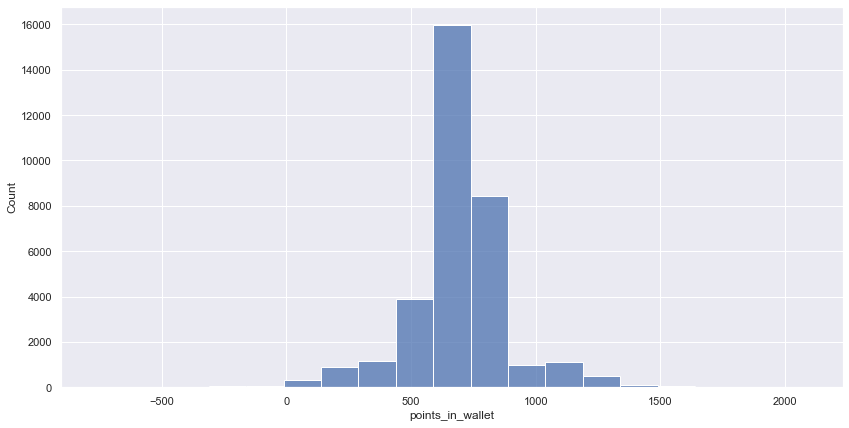

In [126]:
sns.histplot(customer_churn_train["points_in_wallet"], binwidth = 150)

In [127]:
customer_churn_train["points_in_wallet"] = customer_churn_train["points_in_wallet"].fillna(customer_churn_train["points_in_wallet"].mean())

In [128]:
customer_churn_train.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

# Exploratory Data Analysis (Univariate)

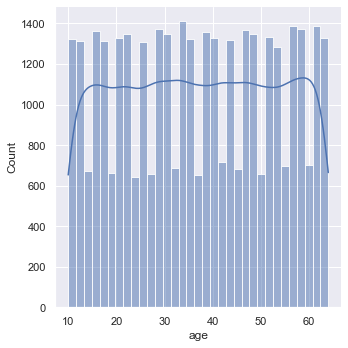

In [129]:
# numerical data
sns.set(rc = {'figure.figsize':(7,5)})
sns.displot(customer_churn_train['age'], kde = True)




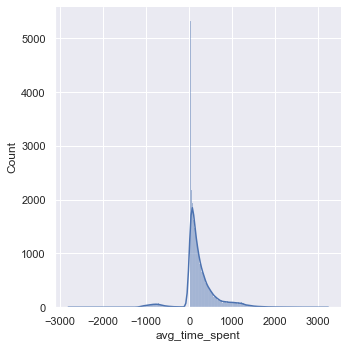

In [130]:
sns.displot(customer_churn_train['avg_time_spent'], kde =True)


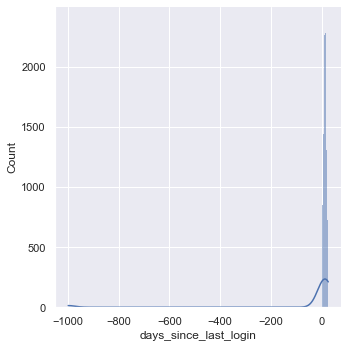

In [131]:
sns.displot(customer_churn_train['days_since_last_login'], kde = True)

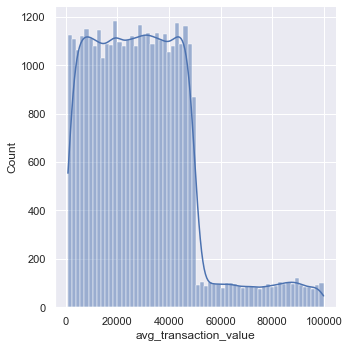

In [132]:
sns.displot(customer_churn_train['avg_transaction_value'], kde = True)

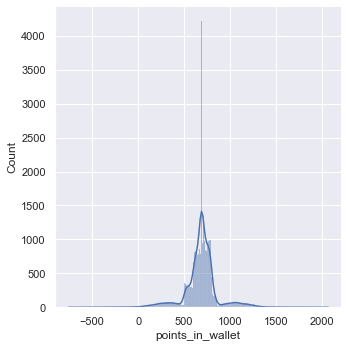

In [133]:
sns.displot(customer_churn_train['points_in_wallet'], kde =True)

# Bivariate/Multivariate

In [134]:
customer_churn_train

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.340000,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,Town,Basic Membership,2017-09-21,No,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,Town,Basic Membership,2016-09-11,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [135]:
customer_churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [136]:
customer_churn_train['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [137]:
customer_churn_train[["joining_date"]]

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12
...,...
36987,2017-09-21
36988,2016-06-27
36989,2016-09-11
36990,2017-06-15


In [138]:
customer_churn_train[["joining_date_year", 'joining_date_month', 'joining_date_day']] = customer_churn_train['joining_date'].str.split('-', expand= True).astype(int)

In [139]:
customer_churn_train.drop(columns='joining_date', axis = 1, inplace= True)

In [140]:
customer_churn_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'joining_date_year',
       'joining_date_month', 'joining_date_day'],
      dtype='object')

<AxesSubplot:xlabel='joining_date_year', ylabel='churn_risk_score'>

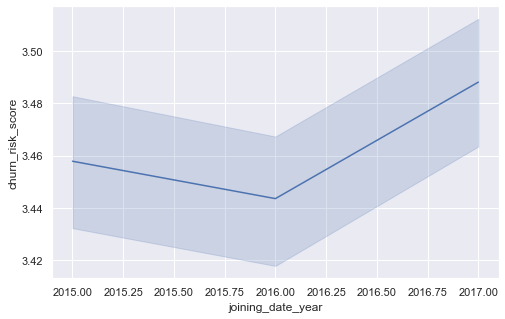

In [141]:
sns.set(rc = {'figure.figsize':(8,5)})

sns.lineplot(x = customer_churn_train['joining_date_year'], y = customer_churn_train["churn_risk_score"])

<AxesSubplot:xlabel='membership_category', ylabel='avg_time_spent'>

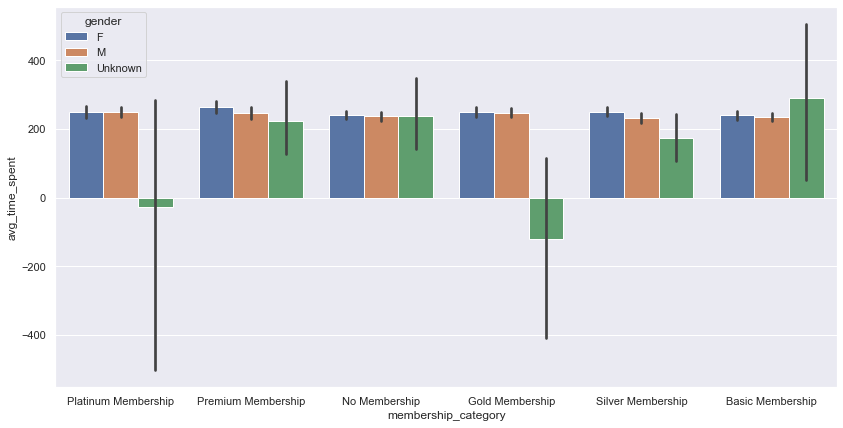

In [142]:
sns.set(rc = {'figure.figsize':(14,7)})
sns.barplot(x = customer_churn_train["membership_category"], y = customer_churn_train["avg_time_spent"], hue = customer_churn_train["gender"])

<AxesSubplot:xlabel='churn_risk_score', ylabel='Density'>

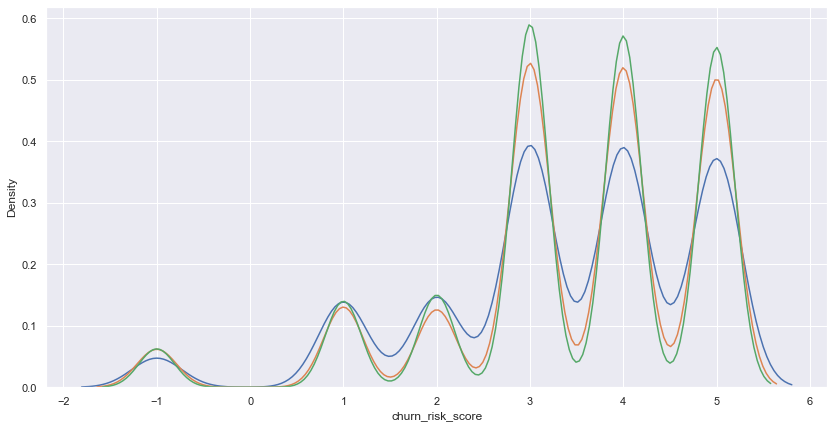

In [143]:
sns.kdeplot(customer_churn_train[customer_churn_train['region_category']=="Village"]["churn_risk_score"],)
sns.kdeplot(customer_churn_train[customer_churn_train['region_category']=="City"]["churn_risk_score"])
sns.kdeplot(customer_churn_train[customer_churn_train['region_category']=="Town"]["churn_risk_score"])

<AxesSubplot:xlabel='gender', ylabel='membership_category'>

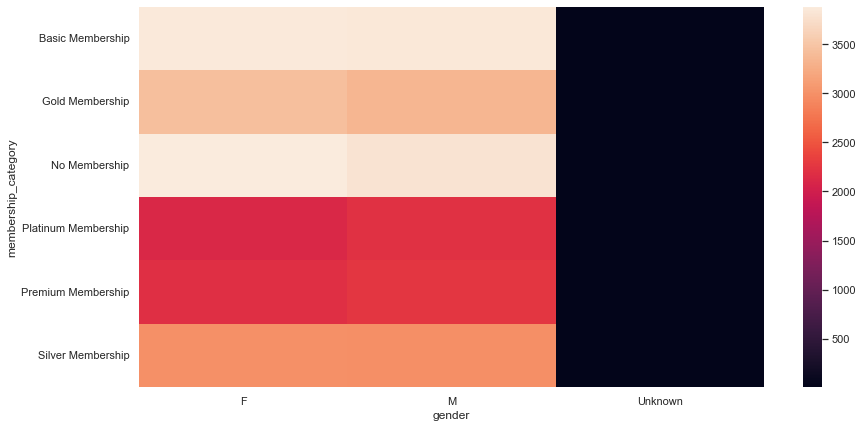

In [144]:
sns.heatmap(pd.crosstab(customer_churn_train["membership_category"], customer_churn_train["gender"]))

In [145]:
s = (customer_churn_train[customer_churn_train['joined_through_referral']=='?'].index)
customer_churn_train.loc[s, 'joined_through_referral']= customer_churn_train['joined_through_referral'].mode()[0]
customer_churn_train['joined_through_referral'].value_counts()


No     21277
Yes    15715
Name: joined_through_referral, dtype: int64

<AxesSubplot:xlabel='joined_through_referral', ylabel='churn_risk_score'>

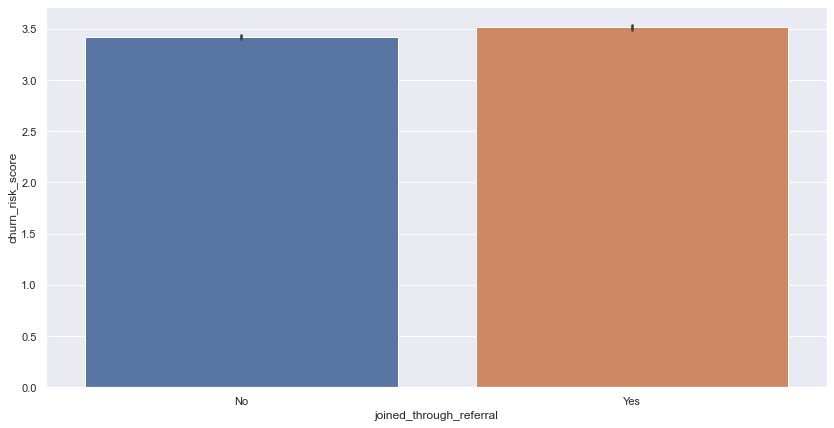

In [146]:
sns.barplot(x= customer_churn_train['joined_through_referral'], y = customer_churn_train['churn_risk_score'])

<AxesSubplot:xlabel='used_special_discount', ylabel='count'>

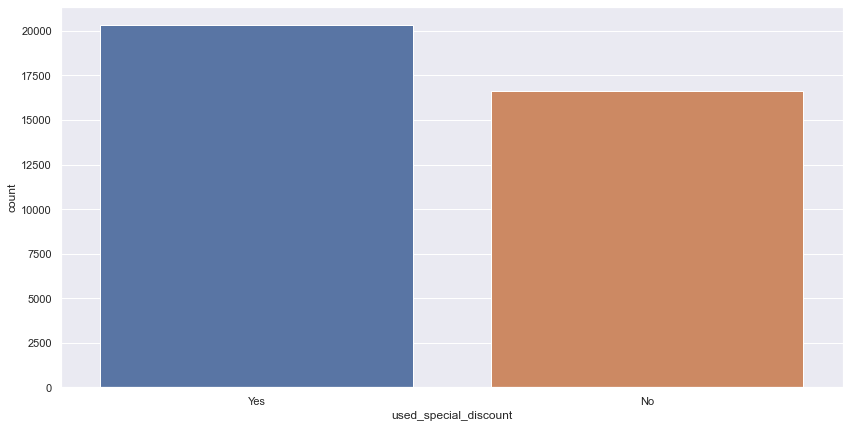

In [147]:
sns.countplot(x = customer_churn_train['used_special_discount'])

In [148]:
customer_churn_train['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [149]:
ind = customer_churn_train[customer_churn_train['medium_of_operation']=='?'].index

In [150]:
customer_churn_train.loc[ind, 'medium_of_operation']= customer_churn_train['medium_of_operation'].mode()[0]

In [151]:
customer_churn_train['medium_of_operation'].value_counts()

Desktop       19306
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64

In [152]:
customer_churn_train['past_complaint'].value_counts()

No     18602
Yes    18390
Name: past_complaint, dtype: int64

<AxesSubplot:xlabel='churn_risk_score', ylabel='Density'>

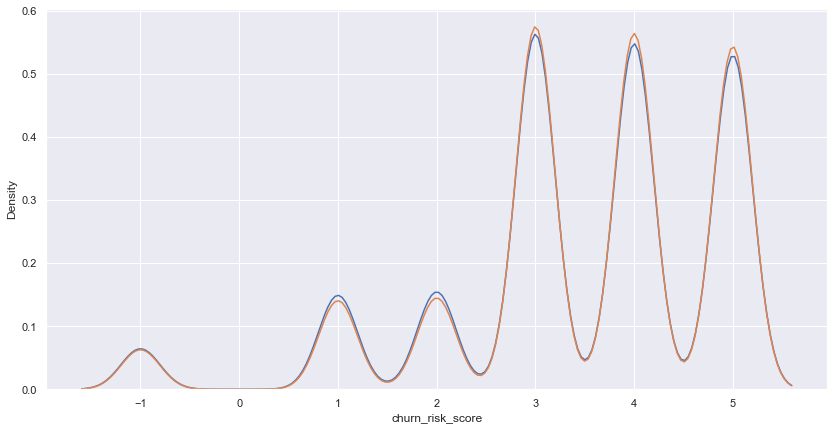

In [153]:
sns.kdeplot(customer_churn_train[customer_churn_train['past_complaint']=='No']['churn_risk_score'])
sns.kdeplot(customer_churn_train[customer_churn_train['past_complaint']=='Yes']['churn_risk_score'])

In [154]:
ind1 = customer_churn_train[customer_churn_train['avg_frequency_login_days']=="Error"].index
customer_churn_train.loc[ind1, ['avg_frequency_login_days']]= np.NaN

In [155]:
customer_churn_train['avg_frequency_login_days'] = [float(a) for a in customer_churn_train['avg_frequency_login_days']]

In [156]:
customer_churn_train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                    0
membership_category                0
joined_through_referral            0
referral_id                        0
preferred_offer_types              0
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        3522
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
joining_date_year                  0
joining_date_month                 0
joining_date_day                   0
d

<AxesSubplot:xlabel='avg_frequency_login_days', ylabel='Count'>

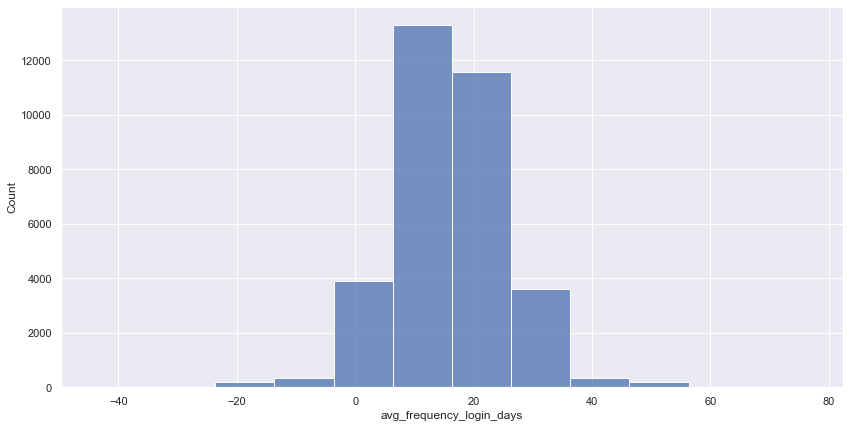

In [157]:
sns.histplot(customer_churn_train['avg_frequency_login_days'], binwidth = 10)

In [158]:
customer_churn_train['avg_frequency_login_days'] = customer_churn_train['avg_frequency_login_days'].fillna(customer_churn_train['avg_frequency_login_days'].mean())

In [159]:
customer_churn_train.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
joining_date_year               0
joining_date_month              0
joining_date_day                0
dtype: int64

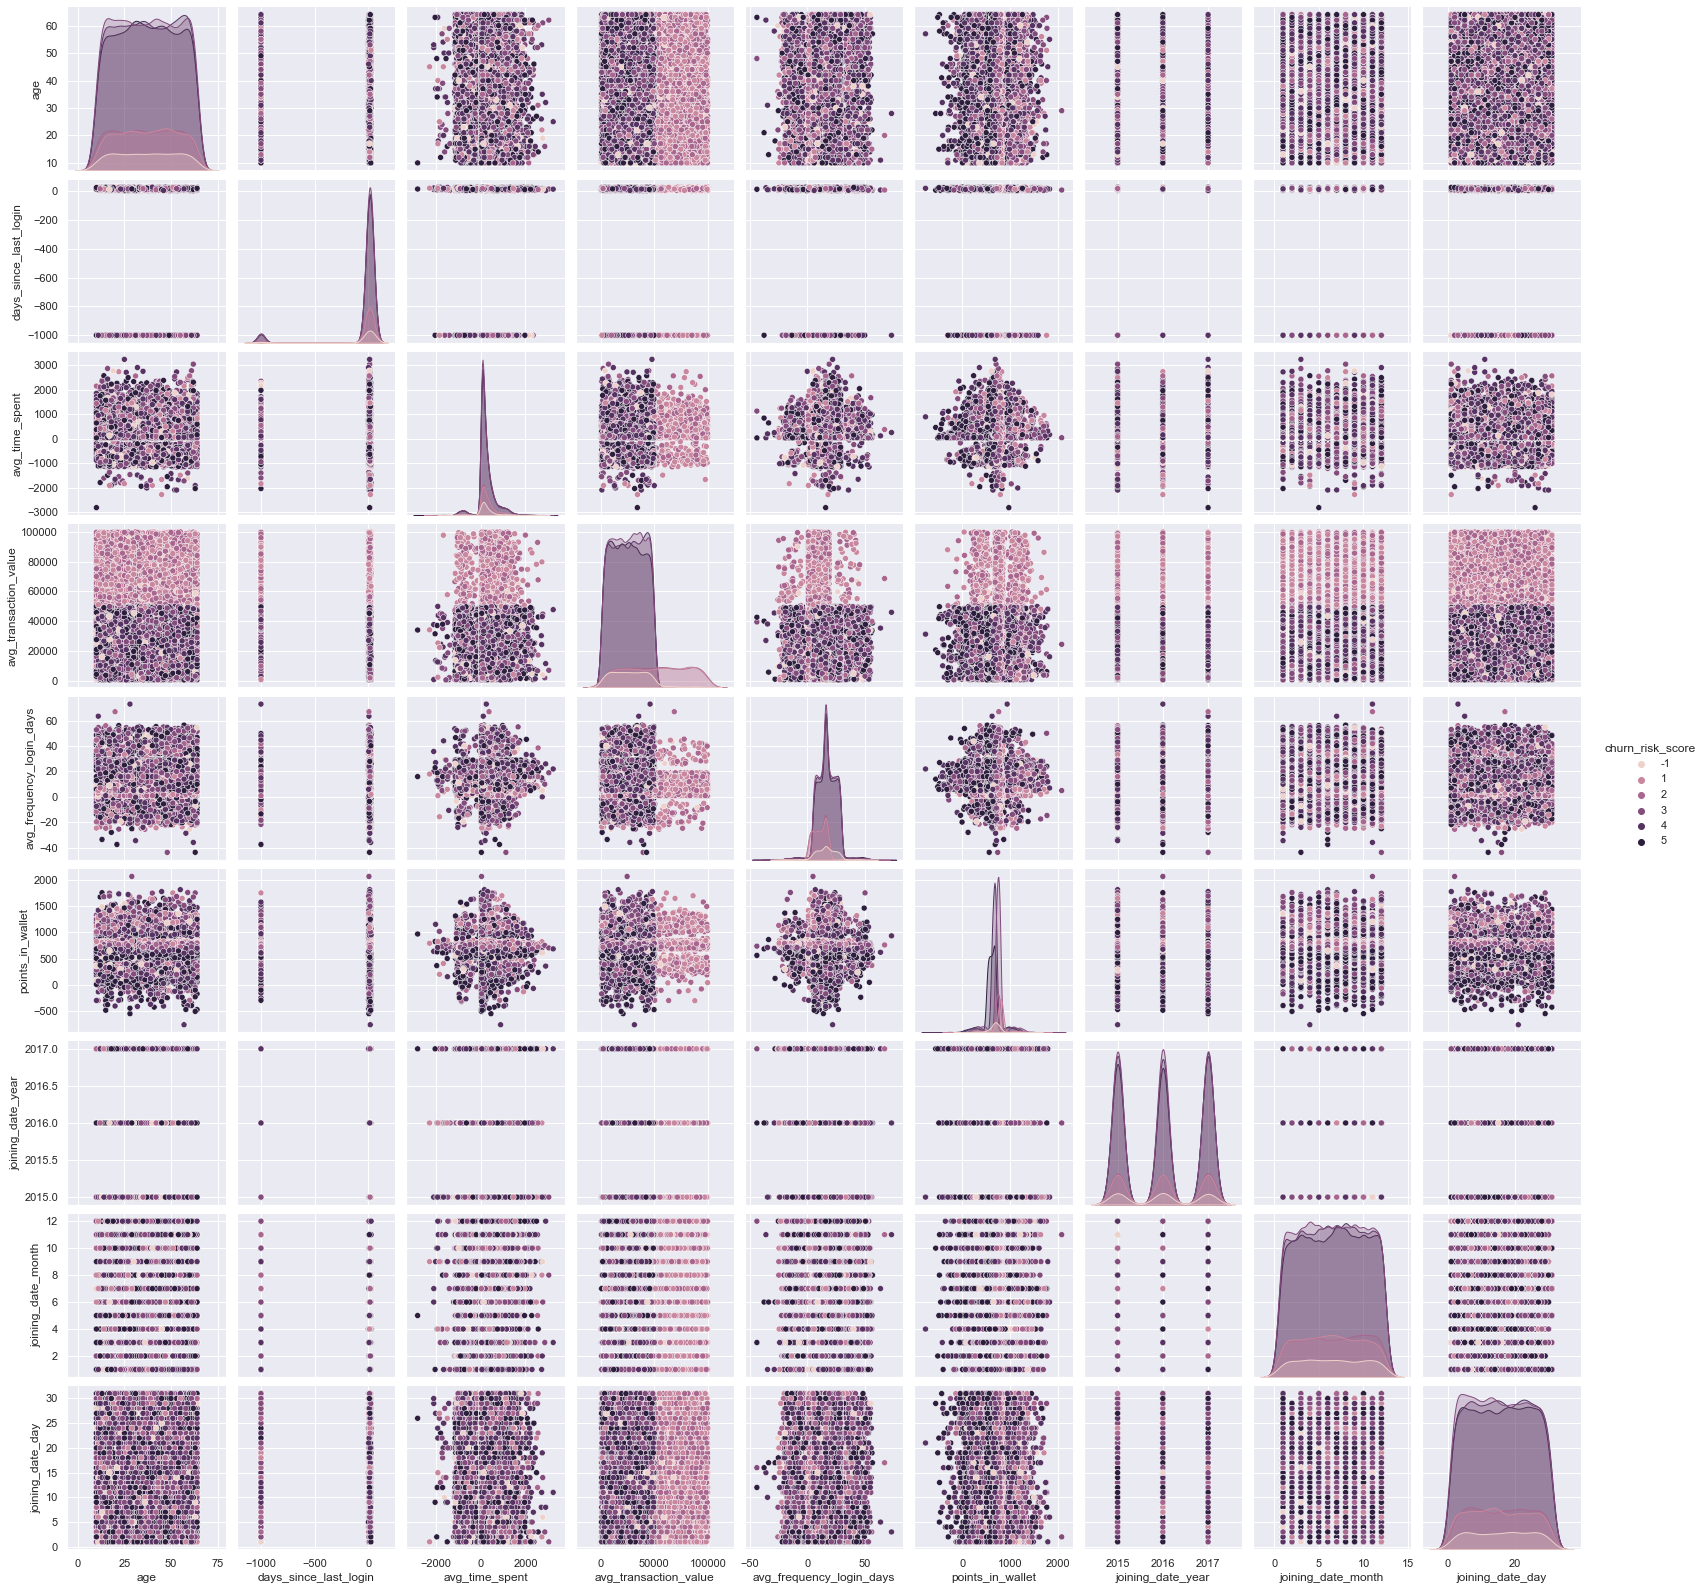

In [160]:
sns.pairplot(customer_churn_train, hue = "churn_risk_score")

<AxesSubplot:xlabel='joined_through_referral', ylabel='membership_category'>

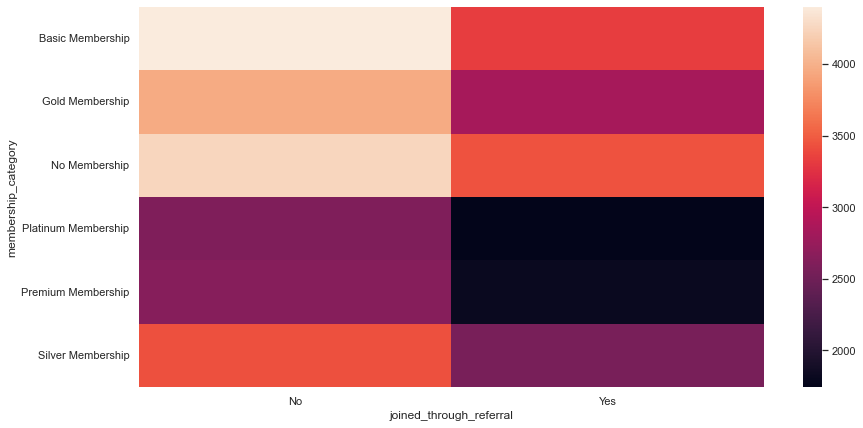

In [161]:
sns.heatmap(pd.crosstab(customer_churn_train['membership_category'], customer_churn_train['joined_through_referral']))

<AxesSubplot:xlabel='used_special_discount', ylabel='membership_category'>

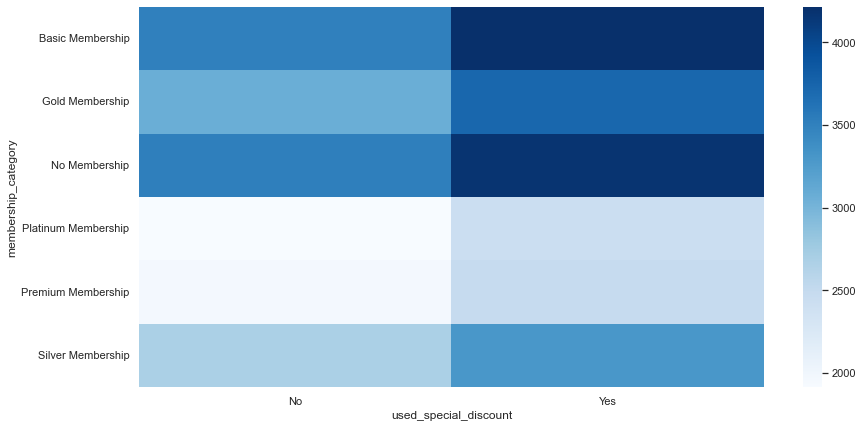

In [162]:
sns.heatmap(pd.crosstab(customer_churn_train['membership_category'], customer_churn_train['used_special_discount']), cmap='Blues')

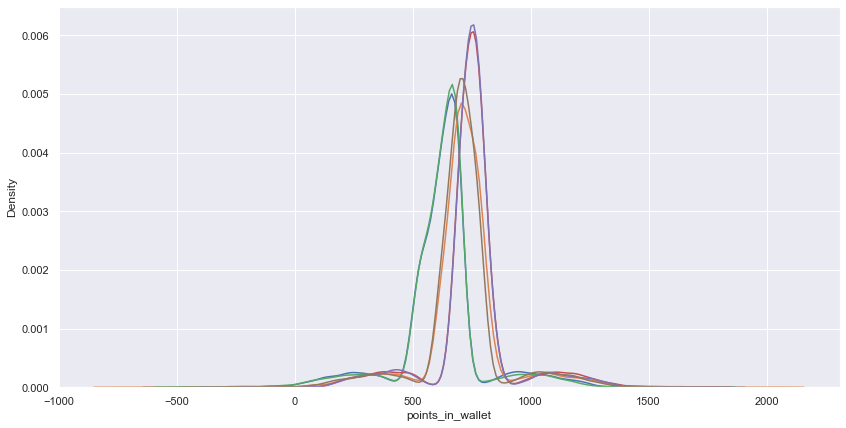

In [163]:
mem_array = ['Basic Membership', 'Gold Membership', 'No Membership', 'Platinum Membership', 'Premium Membership', 'Silver Membership']
for i in mem_array:
    sns.kdeplot(customer_churn_train[customer_churn_train['membership_category']==i]['points_in_wallet'])


<AxesSubplot:xlabel='medium_of_operation', ylabel='avg_time_spent'>

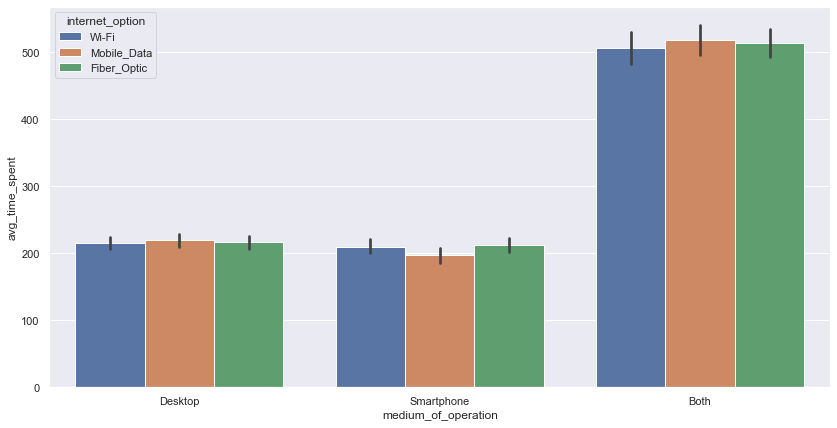

In [164]:
sns.barplot(x = customer_churn_train['medium_of_operation'], y = customer_churn_train['avg_time_spent'], hue = customer_churn_train['internet_option'])

In [165]:
customer_churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [166]:
customer_churn_train['last_visit_time']

0        16:08:02
1        12:38:13
2        22:53:21
3        15:57:50
4        15:46:44
           ...   
36987    04:14:05
36988    23:18:31
36989    03:50:25
36990    09:50:03
36991    01:39:52
Name: last_visit_time, Length: 36992, dtype: object

In [167]:
customer_churn_train[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = customer_churn_train['last_visit_time'].astype(str).str.split(':', expand = True).astype(int)

In [168]:
customer_churn_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'joining_date_year',
       'joining_date_month', 'joining_date_day', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds'],
      dtype='object')

In [169]:
customer_churn_train = customer_churn_train.drop(columns = 'last_visit_time', axis = 1)

In [170]:
customer_churn_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score',
       'joining_date_year', 'joining_date_month', 'joining_date_day',
       'last_visit_time_hour', 'last_visit_time_minutes',
       'last_visit_time_seconds'],
      dtype='object')

In [171]:
customer_churn_train.drop(columns = ['customer_id', 'Name','security_no', 'referral_id'], inplace=True)

In [172]:

print(customer_churn_train['membership_category'].unique(), customer_churn_train['complaint_status'].unique(), customer_churn_train['feedback'].unique())

['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership'] ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available'] ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


In [173]:
neg_arr = [ 'Poor Website','No reason specified', 'Poor Product Quality' ,'Poor Customer Service','Too many ads']
for j in neg_arr:
    ind_neg = customer_churn_train[customer_churn_train['feedback']==j].index
    customer_churn_train.loc[ind_neg, ['feedback']] = 'Negative'
customer_churn_train



,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,past_complaint,complaint_status,feedback,churn_risk_score,joining_date_year,joining_date_month,joining_date_day,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.630000,...,No,Not Applicable,Products always in Stock,2,2017,8,17,16,8,2
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.340000,...,Yes,Solved,Quality Customer Care,1,2017,8,28,12,38,13
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.160000,...,Yes,Solved in Follow-up,Negative,5,2016,11,11,22,53,21
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.270000,...,Yes,Unsolved,Negative,5,2016,10,29,15,57,50
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.130000,...,Yes,Solved,Negative,5,2017,9,12,15,46,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,2,-650.682759,...,Yes,No Information Available,Negative,4,2017,9,21,4,14,5
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,13,-638.123421,...,No,Not Applicable,Negative,5,2016,6,27,23,18,31
36989,23,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,154.940000,...,Yes,Unsolved,Negative,4,2016,9,11,3,50,25
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15,482.610000,...,No,Not Applicable,Negative,3,2017,6,15,9,50,3


In [174]:
pos_arr = ['Products always in Stock','Quality Customer Care','User Friendly Website','Reasonable Price']
for j in pos_arr:
    ind_neg = customer_churn_train[customer_churn_train['feedback']==j].index
    customer_churn_train.loc[ind_neg, ['feedback']] = 'Positive'
customer_churn_train

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,past_complaint,complaint_status,feedback,churn_risk_score,joining_date_year,joining_date_month,joining_date_day,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.630000,...,No,Not Applicable,Positive,2,2017,8,17,16,8,2
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.340000,...,Yes,Solved,Positive,1,2017,8,28,12,38,13
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.160000,...,Yes,Solved in Follow-up,Negative,5,2016,11,11,22,53,21
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.270000,...,Yes,Unsolved,Negative,5,2016,10,29,15,57,50
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.130000,...,Yes,Solved,Negative,5,2017,9,12,15,46,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,2,-650.682759,...,Yes,No Information Available,Negative,4,2017,9,21,4,14,5
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,13,-638.123421,...,No,Not Applicable,Negative,5,2016,6,27,23,18,31
36989,23,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,154.940000,...,Yes,Unsolved,Negative,4,2016,9,11,3,50,25
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15,482.610000,...,No,Not Applicable,Negative,3,2017,6,15,9,50,3


# Splitting the dataset in features and target

In [175]:
X = customer_churn_train.drop(columns = 'churn_risk_score', axis = 1)
Y = customer_churn_train['churn_risk_score']

In [176]:
X

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,offer_application_preference,past_complaint,complaint_status,feedback,joining_date_year,joining_date_month,joining_date_day,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.630000,...,Yes,No,Not Applicable,Positive,2017,8,17,16,8,2
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.340000,...,No,Yes,Solved,Positive,2017,8,28,12,38,13
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.160000,...,Yes,Yes,Solved in Follow-up,Negative,2016,11,11,22,53,21
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.270000,...,Yes,Yes,Unsolved,Negative,2016,10,29,15,57,50
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.130000,...,Yes,Yes,Solved,Negative,2017,9,12,15,46,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,2,-650.682759,...,Yes,Yes,No Information Available,Negative,2017,9,21,4,14,5
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,13,-638.123421,...,No,No,Not Applicable,Negative,2016,6,27,23,18,31
36989,23,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,154.940000,...,Yes,Yes,Unsolved,Negative,2016,9,11,3,50,25
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15,482.610000,...,Yes,No,Not Applicable,Negative,2017,6,15,9,50,3


In [178]:
Y.iloc[Y[Y==-1].index] = 0

C:\Users\TEMP\AppData\Local\Temp\ipykernel_21744\3863629058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.iloc[Y[Y==-1].index] = 0


In [179]:
Y.unique()

array([2, 1, 5, 3, 4, 0], dtype=int64)

# Label ecoding using columntransformer

In [180]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


transformer = ColumnTransformer(transformers = [
    ('tnf1', OrdinalEncoder(categories= [['No Membership', 'Basic Membership','Silver Membership', 'Gold Membership','Platinum Membership','Premium Membership'],
                                        ['No Information Available','Unsolved', 'Solved in Follow-up', 'Solved','Not Applicable' ],
                                        ['Negative', 'Positive'], ['No', 'Yes']]), ['membership_category', 'complaint_status', 'feedback', 'past_complaint']),
    ('tnf2', OneHotEncoder(sparse =False,drop = 'first'), [ 'gender', 'region_category','joined_through_referral', 'preferred_offer_types',
                                                           'medium_of_operation', 'internet_option','used_special_discount','offer_application_preference'])
] , remainder= 'passthrough')

In [181]:
X = transformer.fit_transform(X)



In [182]:
customer_churn_train.shape

(36992, 25)

In [183]:
X.shape

(36992, 29)

In [184]:
X[1]

array([5.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 3.20000000e+01, 1.60000000e+01, 3.06340000e+02,
       1.28383800e+04, 1.00000000e+01, 6.86882199e+02, 2.01700000e+03,
       8.00000000e+00, 2.80000000e+01, 1.20000000e+01, 3.80000000e+01,
       1.30000000e+01])

# Standardizing

In [185]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


# Splitting features and target into train and test data

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Understanding importance of features

In [188]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [217]:
print(model.feature_importances_)

[2.27669649e-01 1.24805227e-02 1.05441007e-01 4.96604385e-03
 6.20777266e-03 1.98379336e-04 6.07405127e-03 3.85958942e-03
 5.81158877e-03 4.88043875e-03 4.59930269e-03 5.57016537e-03
 5.09291811e-03 5.60153195e-03 5.34179214e-03 5.12365954e-03
 5.04741783e-03 3.27687471e-02 2.86224159e-02 3.91395942e-02
 6.62874630e-02 3.64854683e-02 2.23448579e-01 1.02692815e-02
 2.38124064e-02 2.98252612e-02 2.88085596e-02 3.32650058e-02
 3.33013883e-02]


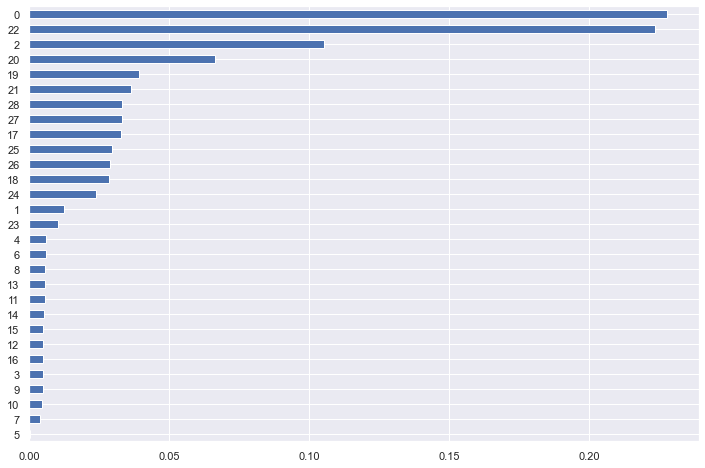

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_).sort_values()
feat_importances.plot(kind='barh', )
plt.show()


# Model fitting 

In [191]:
# import necessary dependencies
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


# Random Forest

In [192]:
y_pred_train = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, y_pred_train)
print("Training accuracy for random forest is ",training_accuracy*100, "%")

Training accuracy for random forest is  100.0 %


In [193]:
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test accuracy for random forest is ",round(test_accuracy*100,2), "%")

Test accuracy for random forest is  75.21 %


# Decision Trees

In [194]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [195]:
Y_pred_train_dt = model_dt.predict(X_train)
training_accuracy_dt = accuracy_score(Y_train, Y_pred_train_dt)
print("Training accuracy for Decision Tree is ",round(training_accuracy_dt*100,2), "%")

Training accuracy for Decision Tree is  100.0 %


In [196]:
Y_test_pred_dt = model_dt.predict(X_test)
test_accuracy_dt = accuracy_score(Y_test, Y_test_pred_dt)
print("Test accuracy for Decision tree is ",round(test_accuracy_dt*100,2), "%")

Test accuracy for Decision tree is  71.69 %


# KNN

In [197]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [198]:
Y_pred_train_knn = model_knn.predict(X_train)
training_accuracy_knn = accuracy_score(Y_train, Y_pred_train_knn)
print("Training accuracy for KNN is ",round(training_accuracy_knn*100,2), "%")

Training accuracy for KNN is  69.14 %


In [199]:
Y_pred_test_knn = model_knn.predict(X_test)
test_accuracy_knn = accuracy_score(Y_test, Y_pred_test_knn)
print("Test accuracy for KNN is ",round(test_accuracy_knn*100,2), "%")

Test accuracy for KNN is  51.29 %


# GaussianNB

In [200]:
model_NB = GaussianNB()
model_NB.fit(X_train,Y_train)

GaussianNB()

In [201]:
Y_pred_train_nb = model_NB.predict(X_train)
training_accuracy_NB = accuracy_score(Y_train, Y_pred_train_nb)
print("Training accuracy for GaussianNB is ",round(training_accuracy_NB*100,2), "%")

Training accuracy for GaussianNB is  63.18 %


In [202]:
Y_pred_test_NB = model_NB.predict(X_test)
test_accuracy_nb = accuracy_score(Y_test, Y_pred_test_NB)
print("Test accuracy for GaussianNB is ",round(test_accuracy_nb*100,2), "%")

Test accuracy for GaussianNB is  63.85 %


In [203]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [204]:
Y_pred_train_XGB = model_XGB.predict(X_train)
training_accuracy_XGB = accuracy_score(Y_train, Y_pred_train_XGB)
print("Training accuracy for XGBoost is ",round(training_accuracy_XGB*100,2), "%")

Training accuracy for XGBoost is  94.4 %


In [205]:
Y_pred_test_XGB = model_XGB.predict(X_test)
test_accuracy_XGB = accuracy_score(Y_test, Y_pred_test_XGB)
print("Test accuracy for XGBoost is ",round(test_accuracy_XGB*100,2), "%")

Test accuracy for XGBoost is  75.32 %


# Hyperparameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [212]:
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }
clf = RandomizedSearchCV(estimator=model_XGB,
                             param_distributions=params,
                             scoring='accuracy',
                             n_jobs=4,
                             verbose=1)
clf.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softprob',
                                           p

In [213]:
clf.best_score_

0.7622730923685974

In [214]:
clf.best_params_

{'subsample': 0.5,
 'num_class': 10,
 'n_estimators': 500,
 'max_depth': 6,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.5}